In [1]:
import datetime
import time
import random
import requests
import json
import bson
import gzip
import os

HOME = 'http://localhost:8000/'
CARGA = 100
# HOME = 'https://api-recintos.herokuapp.com/'

In [2]:
letras = 'ABCDEFGHIJKLMNOPQRSTUVXZ'
numeros = ''.join([str(i) for i in range(10)])
textos = 'ABCDEFGHIJKLMNOPQRSTUVXZ          abcdefghijklmnopqrstuvwxyz'
def random_str(num=3, fila=letras):
    result = ''
    for i in range(num):
        result += random.choice(fila)
    return result

   

placas = [random_str(3) + random_str(5, numeros) for i in range(100)]
reboques = [random_str(3) + random_str(5, numeros) for i in range(200)]
conteineres = [random_str(4) + random_str(7, numeros) for i in range(200)]
operadores = [random_str(11) for i in range(10)]
motoristas = [random_str(11) for i in range(50)]
textos = [random_str(random.randint(10, 20), textos) for i in range(50)]

In [3]:
pesagens = []
for r in range(CARGA):
    data = datetime.datetime.now().isoformat()
    operador = random.choice(operadores)
    conteiner = random.choice(conteineres)
    tara = random.randint(9000, 12000)
    pesobrutodeclarado = random.randint(3000, 15000)
    pesobalanca = tara + random.randint(-2000, 2000)
    placa = random.choice(placas)
    reboque = random.choice(reboques)
    texto = random.choice(textos)
    pesagem = \
    {'IDEvento': r,
     'capturaautomatica': True,
     'conteiner': random.choice(conteineres),
     'dataevento': data,
     'dataregistro': data,
     'documentotransporte': texto,
     'operadorevento': operador,
     'operadorregistro': operador,
     'pesobalanca': pesobalanca,
     'pesobrutodeclarado': pesobrutodeclarado,
     'placa': placa,
     'placasemireboque': reboque,
     'taraconjunto': tara,
     'tipodocumentotransporte': 'CE'}
    pesagens.append(pesagem)


In [4]:
pesagens[:5]

[{'IDEvento': 0,
  'capturaautomatica': True,
  'conteiner': 'VEMC3556525',
  'dataevento': '2019-05-27T14:14:43.968544',
  'dataregistro': '2019-05-27T14:14:43.968544',
  'documentotransporte': 'krAIOOhVb fscT ITf',
  'operadorevento': 'PIXQUHJKPUA',
  'operadorregistro': 'PIXQUHJKPUA',
  'pesobalanca': 7668,
  'pesobrutodeclarado': 7870,
  'placa': 'ODJ08171',
  'placasemireboque': 'MFR06868',
  'taraconjunto': 9634,
  'tipodocumentotransporte': 'CE'},
 {'IDEvento': 1,
  'capturaautomatica': True,
  'conteiner': 'RCKG1479521',
  'dataevento': '2019-05-27T14:14:43.968581',
  'dataregistro': '2019-05-27T14:14:43.968581',
  'documentotransporte': 'TalScMuoIXZ',
  'operadorevento': 'XOKCPKSMLFD',
  'operadorregistro': 'XOKCPKSMLFD',
  'pesobalanca': 11544,
  'pesobrutodeclarado': 12250,
  'placa': 'AHB14885',
  'placasemireboque': 'NOP58847',
  'taraconjunto': 10079,
  'tipodocumentotransporte': 'CE'},
 {'IDEvento': 2,
  'capturaautomatica': True,
  'conteiner': 'IVSA4778089',
  'dataeve

In [5]:
s0 = time.time()
for pesagem in pesagens[:CARGA // 2]:
    rv = requests.post(HOME + 'pesagemmaritimo',
                   json=pesagem)
    print(rv.status_code)
    print(rv.text)
s1 = time.time()

200
2954819882010737192

405
"Evento repetido ou campo invalido: (sqlite3.IntegrityError) UNIQUE constraint failed: pesagensmaritimo.recinto, pesagensmaritimo.IDEvento\n[SQL: INSERT INTO pesagensmaritimo (\"IDEvento\", dataevento, operadorevento, dataregistro, operadorregistro, recinto, \"request_IP\", documentotransporte, tipodocumentotransporte, numero, placa, placasemireboque, pesobrutodeclarado, taraconjunto, pesobalanca, capturaautomatica) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)]\n[parameters: (1, '2019-05-27 14:14:43.968581', 'XOKCPKSMLFD', '2019-05-27 14:14:43.968581', 'XOKCPKSMLFD', '00001', '127.0.0.1', 'TalScMuoIXZ', 'CE', None, 'AHB14885', 'NOP58847', 12250, 10079, 11544, 0)]\n(Background on this error at: http://sqlalche.me/e/gkpj)"

200
3843295315534994617

200
7027528878213695065

200
-2845156513651532075

200
3929528537474946418

200
3240054518942895799

200
4462796909142851675

200
-4423407689118837085

200
2776518519216528452

200
5076692350918352032

2

In [6]:
print('Gravados %d registros em %d segundos' % (CARGA // 2, s1-s0) )
print((s1 - s0) / (CARGA // 2))

Gravados 50 registros em 2 segundos
0.0


In [7]:
s0 = time.time()
lista_eventos = []
for IDEvento in range(CARGA):
    rv = requests.get(HOME + 'pesagemmaritimo/' + str(IDEvento))
    if rv.status_code == 200:
        lista_eventos.append((rv.status_code, 
                              rv.json()))
#    print(rv.json())
s1 = time.time()

In [8]:
print('Consultados %d registros em %s segundos' % (len(lista_eventos), s1-s0))
print((s1 - s0) / len(lista_eventos))

Consultados 100 registros em 0.8824076652526855 segundos
0.008824076652526856


In [9]:
lista_eventos[:10]

[(200,
  {'ID': 2,
   'IDEvento': 0,
   'capturaautomatica': False,
   'dataevento': '2019-05-27T14:14:43.968544Z',
   'dataregistro': '2019-05-27T14:14:43.968544Z',
   'documentotransporte': 'krAIOOhVb fscT ITf',
   'hash': 2954819882010737192,
   'numero': None,
   'operadorevento': 'PIXQUHJKPUA',
   'operadorregistro': 'PIXQUHJKPUA',
   'pesobalanca': 7668,
   'pesobrutodeclarado': 7870,
   'placa': 'ODJ08171',
   'placasemireboque': 'MFR06868',
   'recinto': '00001',
   'request_IP': '127.0.0.1',
   'taraconjunto': 9634,
   'time_created': '2019-05-27T17:14:44Z',
   'tipodocumentotransporte': 'CE'}),
 (200,
  {'ID': 1,
   'IDEvento': 1,
   'capturaautomatica': False,
   'dataevento': '2019-05-24T14:49:24.258000Z',
   'dataregistro': '2019-05-24T14:49:24.258000Z',
   'documentotransporte': 'string',
   'hash': -6555913091233781475,
   'numero': None,
   'operadorevento': 'string',
   'operadorregistro': 'string',
   'pesobalanca': 0,
   'pesobrutodeclarado': 0,
   'placa': 'string',

In [10]:
json_pesagens = {'PesagemMaritimo': pesagens[CARGA // 2:]}

with open('test.json', 'w', encoding='utf-8', newline='') as json_out:
    json.dump(json_pesagens, json_out)

In [11]:
with open('test.json.gzip', 'wb') as json_out:
    payload = json.dumps(json_pesagens)
    payload = gzip.compress(payload.encode('utf-8'))
    json_out.write(payload)

In [12]:
def tofile(lista, newfilename, zipped=False):
    """Salva instância em arquivo (padrão BSON)."""
    with open(newfilename, 'wb') as f:
        payload = bson.BSON.encode(lista)
        if zipped:
            payload = gzip.compress(payload)
        f.write(payload)


In [13]:
tofile(json_pesagens, 'test.bson')

In [14]:
tofile(json_pesagens, 'test.bson.gzip', zipped=True)

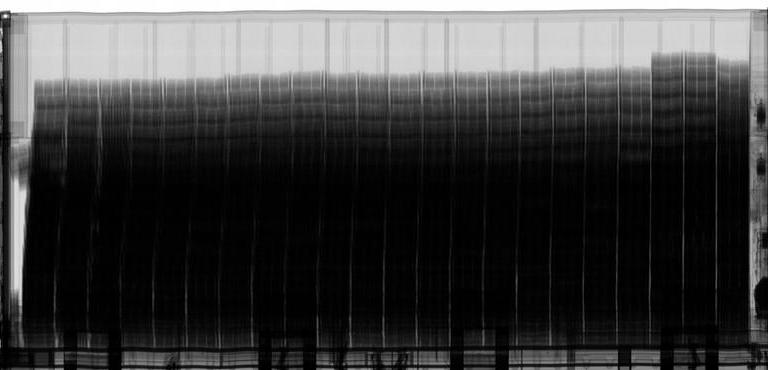

In [15]:
from IPython import display
images = os.listdir('images')
data = {'IDEvento': 0,
       'tipoevento': 'InspecaonaoInvasiva',
       'campoevento': 'nomearquivo'}
image = open(os.path.join('images', images[0]), 'rb').read()
display.Image(image)

In [16]:
files = {'file': (images[0], image, 'image/jpeg')}
headers = {}
# headers['Content-Type'] = 'image/jpeg'
r = requests.post(HOME + 'upload_file',
                  data=data,
                  files=files,
                  headers=headers)
print(r.status_code)
print(r.text)

200
Arquivo salvo


In [17]:
r = requests.get(HOME + 'get_file',
                  data=data,
                  headers=headers)
print(r.status_code)

200


In [18]:
open('test.jpg', 'wb').write(r.content)

28496

In [19]:
from PIL import Image
image = Image.open('test.jpg')

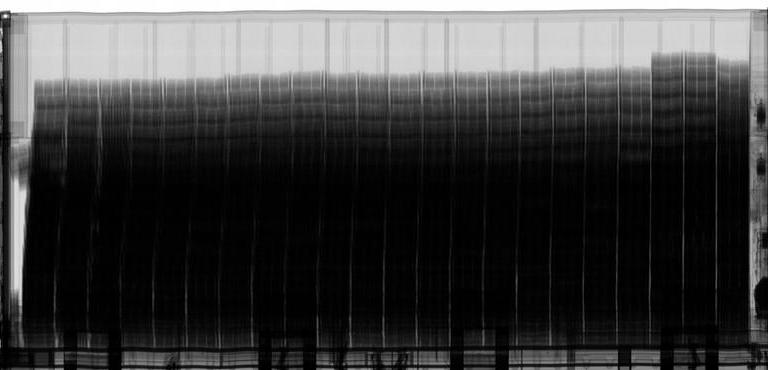

In [20]:
image

In [21]:
s0 = time.time()
query = {'IDEvento': 0,
       'tipoevento': 'PesagemMaritimo'}
r = requests.get(HOME + 'get_eventos_novos',
                  data=query,
                  headers=headers)
s1 = time.time()
print(r.status_code)
print(r.text[:1000])

200
[
  {
    "ID": 1, 
    "IDEvento": 1, 
    "capturaautomatica": false, 
    "dataevento": "2019-05-24T14:49:24.258000Z", 
    "dataregistro": "2019-05-24T14:49:24.258000Z", 
    "documentotransporte": "string", 
    "hash": -6555913091233781475, 
    "numero": null, 
    "operadorevento": "string", 
    "operadorregistro": "string", 
    "pesobalanca": 0, 
    "pesobrutodeclarado": 0, 
    "placa": "string", 
    "placasemireboque": "string", 
    "recinto": "00001", 
    "request_IP": "127.0.0.1", 
    "taraconjunto": 0, 
    "time_created": "2019-05-27T17:14:34Z", 
    "tipodocumentotransporte": "CE"
  }, 
  {
    "ID": 3, 
    "IDEvento": 2, 
    "capturaautomatica": false, 
    "dataevento": "2019-05-27T14:14:43.968598Z", 
    "dataregistro": "2019-05-27T14:14:43.968598Z", 
    "documentotransporte": "LduORqPNvvoaP Krk ", 
    "hash": 3843295315534994617, 
    "numero": null, 
    "operadorevento": "QQZKLZRFROS", 
    "operadorregistro": "QQZKLZRFROS", 
    "pesobalanca": 9932

In [22]:
lista_eventos = json.loads(r.text)

In [23]:
print('Consultados %d registros em %s segundos' % (len(lista_eventos), s1-s0))
print((s1 - s0) / len(lista_eventos))

Consultados 49 registros em 0.04259777069091797 segundos
0.0008693422589983259


In [24]:
lista_eventos[:10]

[{'ID': 1,
  'IDEvento': 1,
  'capturaautomatica': False,
  'dataevento': '2019-05-24T14:49:24.258000Z',
  'dataregistro': '2019-05-24T14:49:24.258000Z',
  'documentotransporte': 'string',
  'hash': -6555913091233781475,
  'numero': None,
  'operadorevento': 'string',
  'operadorregistro': 'string',
  'pesobalanca': 0,
  'pesobrutodeclarado': 0,
  'placa': 'string',
  'placasemireboque': 'string',
  'recinto': '00001',
  'request_IP': '127.0.0.1',
  'taraconjunto': 0,
  'time_created': '2019-05-27T17:14:34Z',
  'tipodocumentotransporte': 'CE'},
 {'ID': 3,
  'IDEvento': 2,
  'capturaautomatica': False,
  'dataevento': '2019-05-27T14:14:43.968598Z',
  'dataregistro': '2019-05-27T14:14:43.968598Z',
  'documentotransporte': 'LduORqPNvvoaP Krk ',
  'hash': 3843295315534994617,
  'numero': None,
  'operadorevento': 'QQZKLZRFROS',
  'operadorregistro': 'QQZKLZRFROS',
  'pesobalanca': 9932,
  'pesobrutodeclarado': 10884,
  'placa': 'DPT42061',
  'placasemireboque': 'KRE58092',
  'recinto': '00

In [25]:
s0 = time.time()
files = {'file': ('test.json', open('test.json', 'r'), 'text/json')}
headers = {}
# headers['Content-Type'] = 'image/jpeg'
r = requests.post(HOME + 'set_eventos_novos',
                  data=data,
                  files=files,
                  headers=headers)
s1 = time.time()
print(r.status_code)
print(r.text)


200
[
  {
    "IDEvento": 50, 
    "hash": 5376875205982366178
  }, 
  {
    "IDEvento": 51, 
    "hash": 5138714474891758236
  }, 
  {
    "IDEvento": 52, 
    "hash": 8449867401744872915
  }, 
  {
    "IDEvento": 53, 
    "hash": -6615647581183587069
  }, 
  {
    "IDEvento": 54, 
    "hash": 7291725661367392876
  }, 
  {
    "IDEvento": 55, 
    "hash": 5892650522028225241
  }, 
  {
    "IDEvento": 56, 
    "hash": 1514008799663150887
  }, 
  {
    "IDEvento": 57, 
    "hash": -6564708283234355518
  }, 
  {
    "IDEvento": 58, 
    "hash": 2767237992348196172
  }, 
  {
    "IDEvento": 59, 
    "hash": -1379657080430322514
  }, 
  {
    "IDEvento": 60, 
    "hash": 52883991147812947
  }, 
  {
    "IDEvento": 61, 
    "hash": -1988958573576253707
  }, 
  {
    "IDEvento": 62, 
    "hash": 8728409888530241631
  }, 
  {
    "IDEvento": 63, 
    "hash": -383924296620926331
  }, 
  {
    "IDEvento": 64, 
    "hash": 8540565051159940489
  }, 
  {
    "IDEvento": 65, 
    "hash": 2743330534

In [26]:
print('Gravados %d registros em %s segundos' % (CARGA // 2, s1-s0))
print((s1 - s0) / (CARGA // 2))

Gravados 50 registros em 0.18632268905639648 segundos
0.0


In [37]:
s0 = time.time()
query = {'recinto': '00001',
         'datainicial': '2019-01-01',
         'datafinal': datetime.datetime.now().isoformat(),
         'altura': 0}
r = requests.post(HOME + 'posicaoconteiner/list',
                  json=query,
                  headers=headers)
s1 = time.time()
print(r.status_code)
print(r.text[:1000])

200
[
  {
    "ID": 1, 
    "IDEvento": 0, 
    "altura": 0, 
    "dataevento": "2019-05-24T16:48:21.245000Z", 
    "dataregistro": "2019-05-24T16:48:21.245000Z", 
    "emconferencia": false, 
    "hash": 4900074607469011650, 
    "numero": "string", 
    "operadorevento": "string", 
    "operadorregistro": "string", 
    "placa": "string", 
    "posicao": "string", 
    "recinto": "00001", 
    "request_IP": "127.0.0.1", 
    "solicitante": "RFB", 
    "time_created": "2019-05-27T17:14:35Z"
  }
]

